In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras

In [2]:
datasettrain_path = 'G:\Study\\3\\term1\AI\Project\images\\train'
#อ่านไฟล์
dataset_file = os.listdir(datasettrain_path)

print(dataset_file)

['angry', 'happy', 'relaxed', 'sad']


In [3]:
from tensorflow.keras.utils import image_dataset_from_directory
image_height = 224
batch_size=32
train_dataset = image_dataset_from_directory(
  datasettrain_path,
  validation_split=0.2,
  subset="training",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 15921 files belonging to 4 classes.
Using 12737 files for training.


In [4]:
path = r'G:\Study\\3\\term1\AI\Project\images'
classS = os.listdir(path)
for file in classS:
    print(file)

test
train


In [5]:
val_ds = image_dataset_from_directory(
  datasettrain_path,
  validation_split=0.2,
  subset="validation",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 15921 files belonging to 4 classes.
Using 3184 files for validation.


In [6]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Flatten, Dense

resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24644495 (94.01 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [9]:
history = resnet_model.fit(train_dataset,validation_data = val_ds, epochs=5)

Epoch 1/5
399/399 [==============================] - 539s 1s/step - loss: 1.2524 - accuracy: 0.4879 - val_loss: 1.2102 - val_accuracy: 0.4868
Epoch 2/5
399/399 [==============================] - 557s 1s/step - loss: 1.0822 - accuracy: 0.5493 - val_loss: 1.1112 - val_accuracy: 0.5317
Epoch 3/5
399/399 [==============================] - 556s 1s/step - loss: 1.0289 - accuracy: 0.5714 - val_loss: 1.1747 - val_accuracy: 0.4915
Epoch 4/5
399/399 [==============================] - 577s 1s/step - loss: 0.9875 - accuracy: 0.5891 - val_loss: 1.1251 - val_accuracy: 0.5327
Epoch 5/5
399/399 [==============================] - 557s 1s/step - loss: 0.9443 - accuracy: 0.6121 - val_loss: 1.1695 - val_accuracy: 0.5374


In [18]:
def predictImg(part):
    image=cv2.imread(part)
    example = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(example)
    image_resized= cv2.resize(image, (image_height,image_height))
    image=np.expand_dims(image_resized,axis=0)
    # print(image)
    pred=resnet_model.predict(image)
    output=dataset_file[np.argmax(pred)]
    print(output)

1/1 [==============================] - 0s 72ms/step
sad


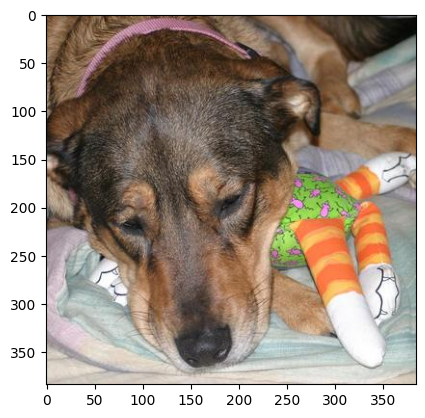

In [19]:
predictImg('G:\Study\\3\\term1\AI\Project\images\\test\\angry\\2870263_7d59064957_b.jpg')

In [20]:
resnet_model.save("dogEmotionModel.h5")

c:\Users\supac\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
